## lets do some experiment of two parameters for DBSCAN

### epsilon, fix min sample to 5 



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

In [8]:
# Generate synthetic data
np.random.seed(42)
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=0)

In [12]:
# Function to plot DBSCAN clustering results
def plot_dbscan(X, eps, min_samples):
    # Perform DBSCAN clustering
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_

    # Identify core samples and noise
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    unique_labels = set(labels)

    # Plot the results
    plt.figure(figsize=(8, 6))
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise
            col = 'k'
        class_member_mask = (labels == k)
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    plt.title(f'DBSCAN Clustering (eps={eps} and (clusters={unique_labels})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

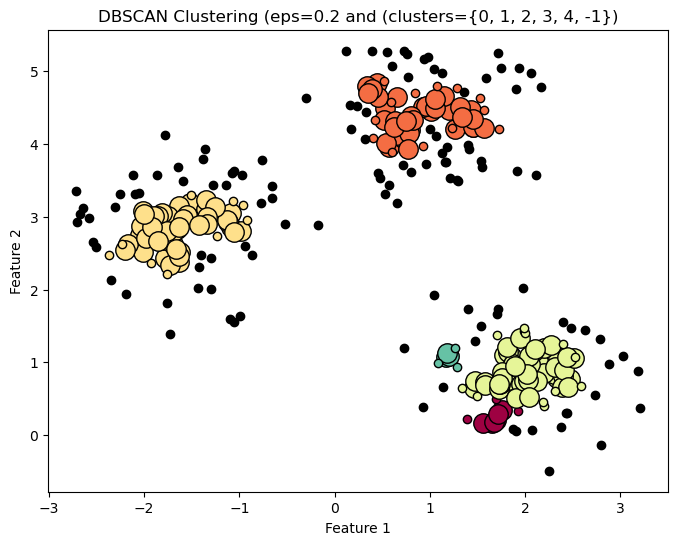

In [15]:
plot_dbscan(X, eps=0.2, min_samples=5)

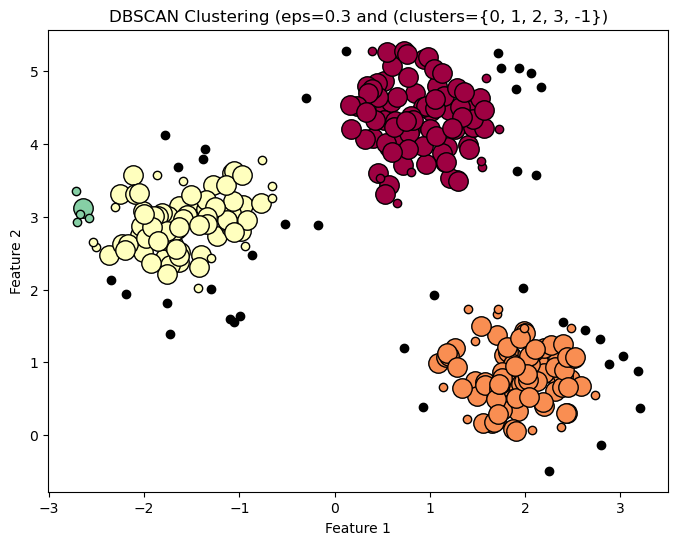

In [17]:
plot_dbscan(X, eps=0.3, min_samples=5)

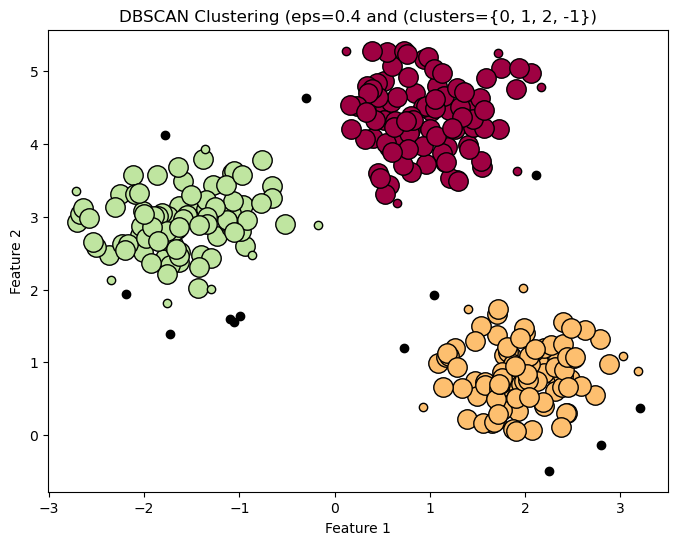

In [19]:
plot_dbscan(X, eps=0.4, min_samples=5)

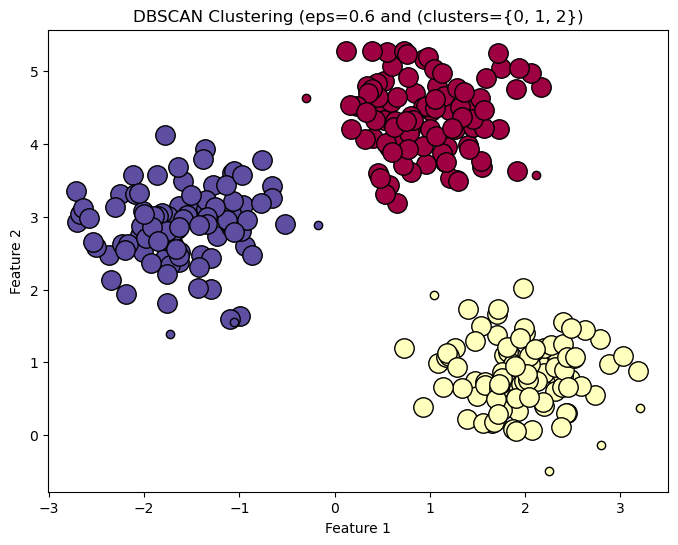

In [22]:
plot_dbscan(X, eps=0.6, min_samples=5)

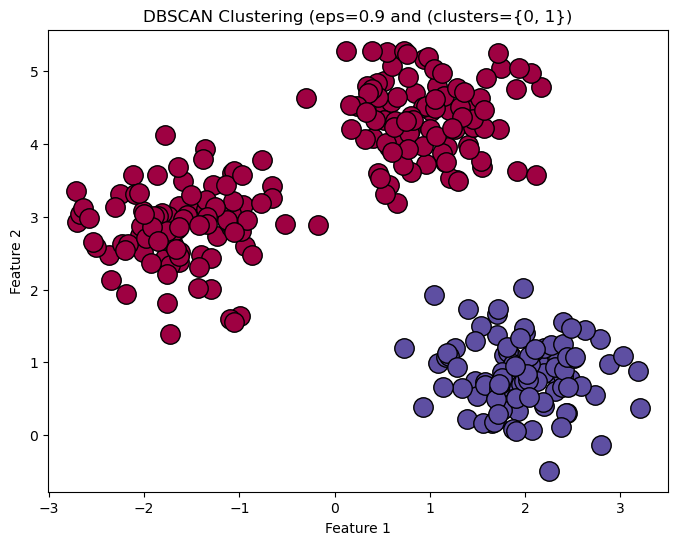

In [25]:
plot_dbscan(X, eps=0.9, min_samples=5)

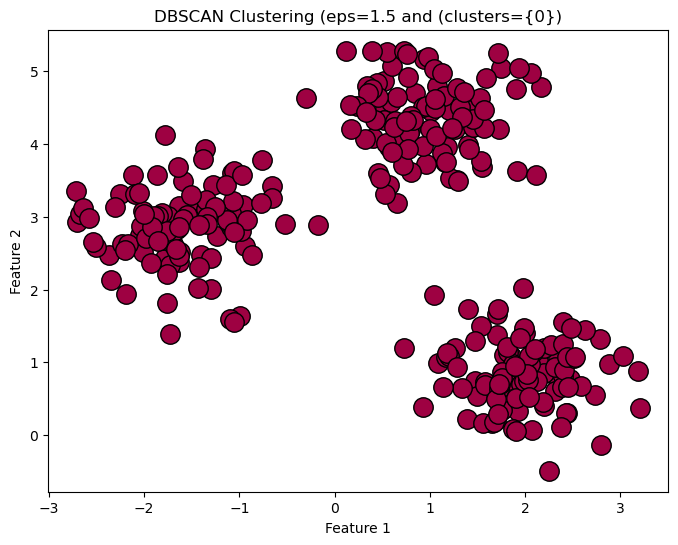

In [27]:
plot_dbscan(X, eps=1.5, min_samples=5)

In [32]:
from sklearn.datasets import make_moons

# Generate synthetic data
np.random.seed(42)
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

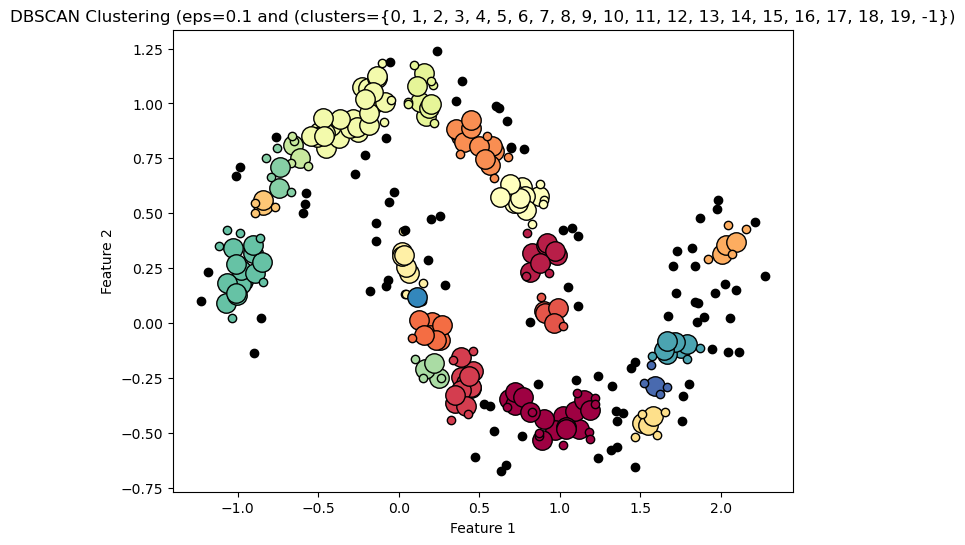

In [36]:
plot_dbscan(X, eps=0.1, min_samples=5)

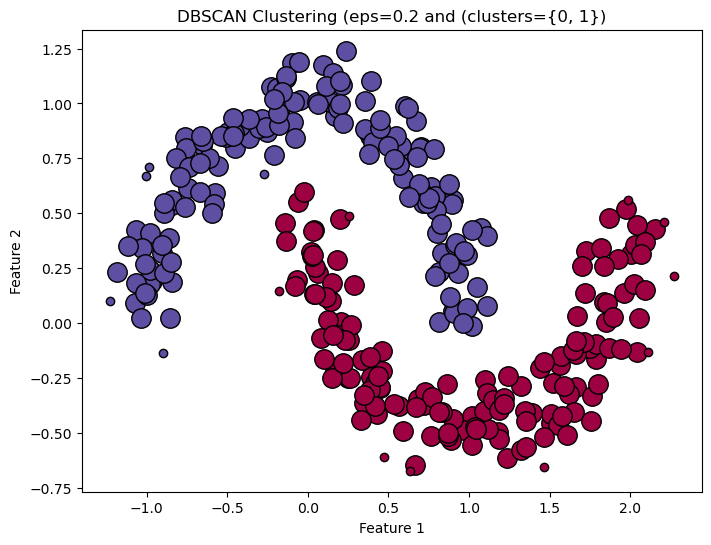

In [38]:
plot_dbscan(X, eps=0.2, min_samples=5)

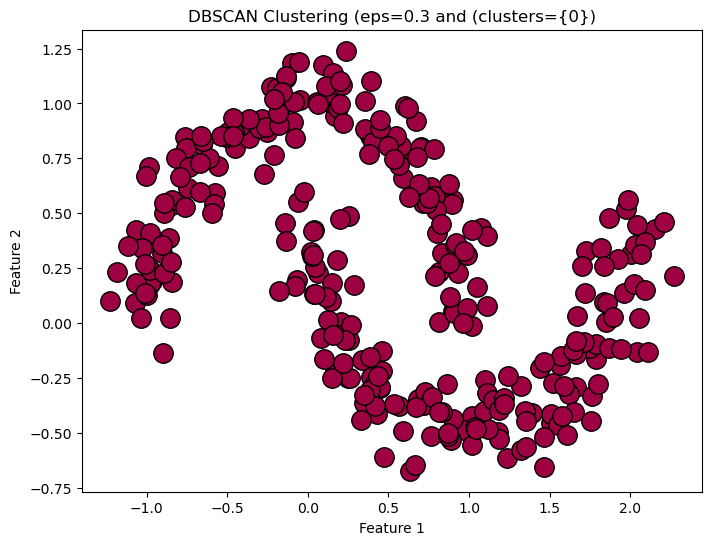

In [39]:
plot_dbscan(X, eps=0.3, min_samples=5)

In [45]:
from sklearn.datasets import make_moons, make_circles
X, _ = make_circles(n_samples=300, noise=0.1, random_state=42)

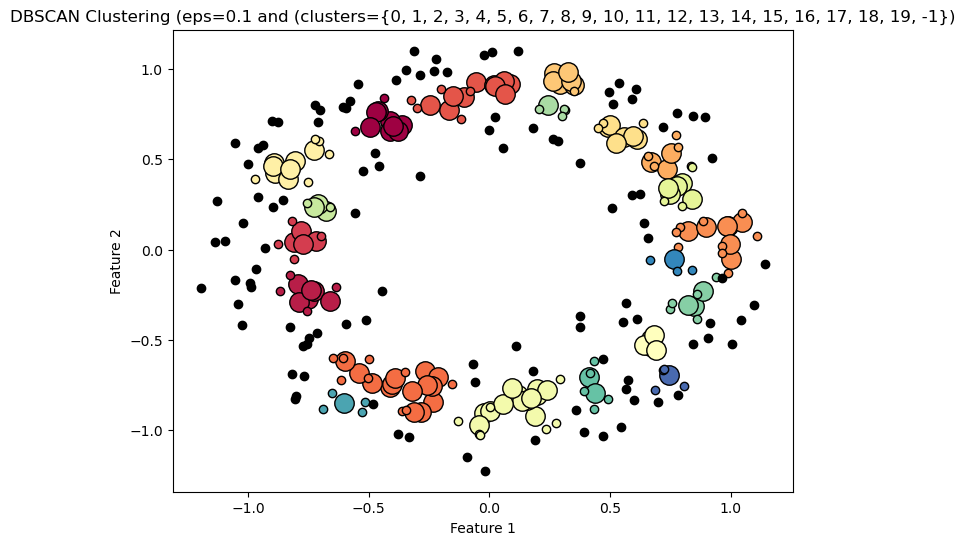

In [47]:
plot_dbscan(X, eps=0.1, min_samples=5)

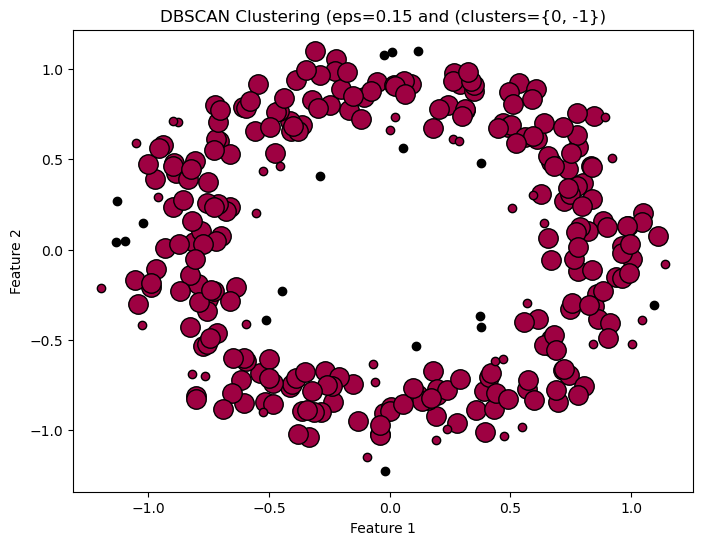

In [50]:
plot_dbscan(X, eps=0.15, min_samples=5)

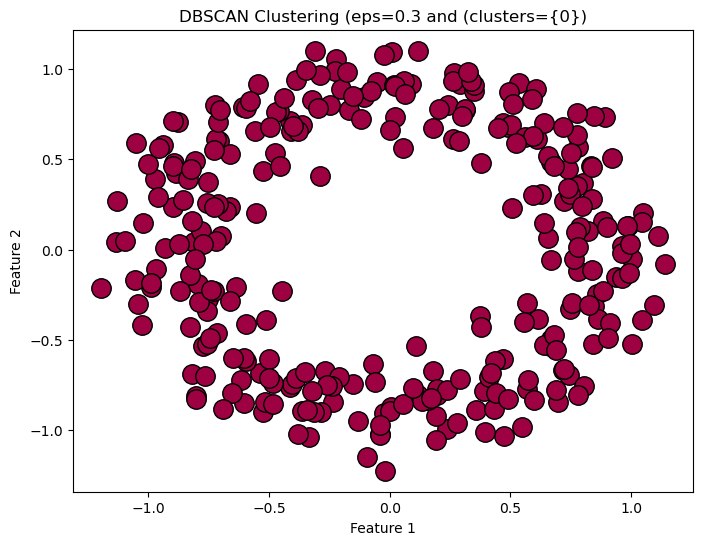

In [55]:
plot_dbscan(X, eps=0.3, min_samples=5)

In [59]:
from sklearn.datasets import make_moons, make_circles, make_blobs, make_classification
X, _ =  make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

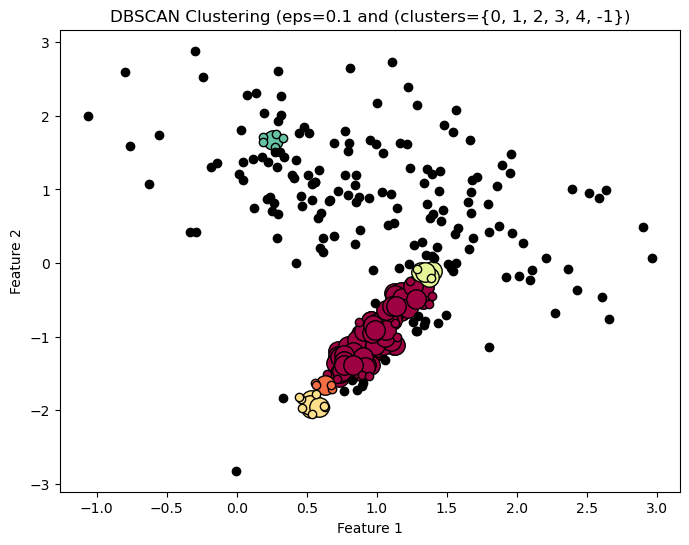

In [61]:
plot_dbscan(X, eps=0.1, min_samples=5)

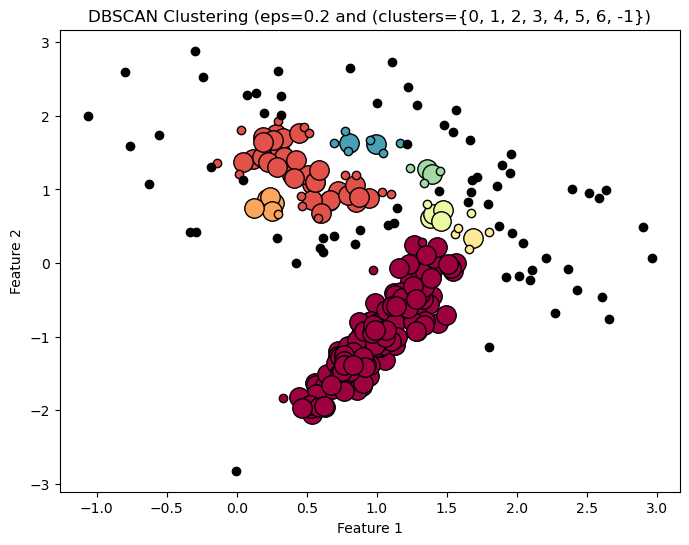

In [62]:
plot_dbscan(X, eps=0.2, min_samples=5)

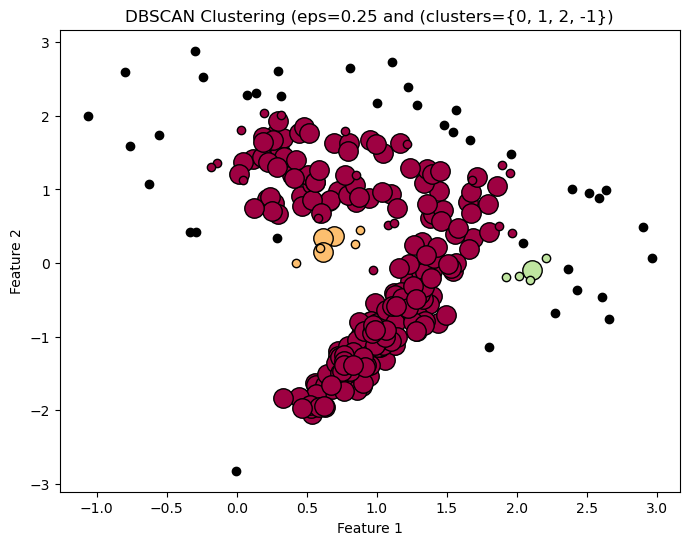

In [63]:
plot_dbscan(X, eps=0.25, min_samples=5)

Data type: moons, Linkage method: single


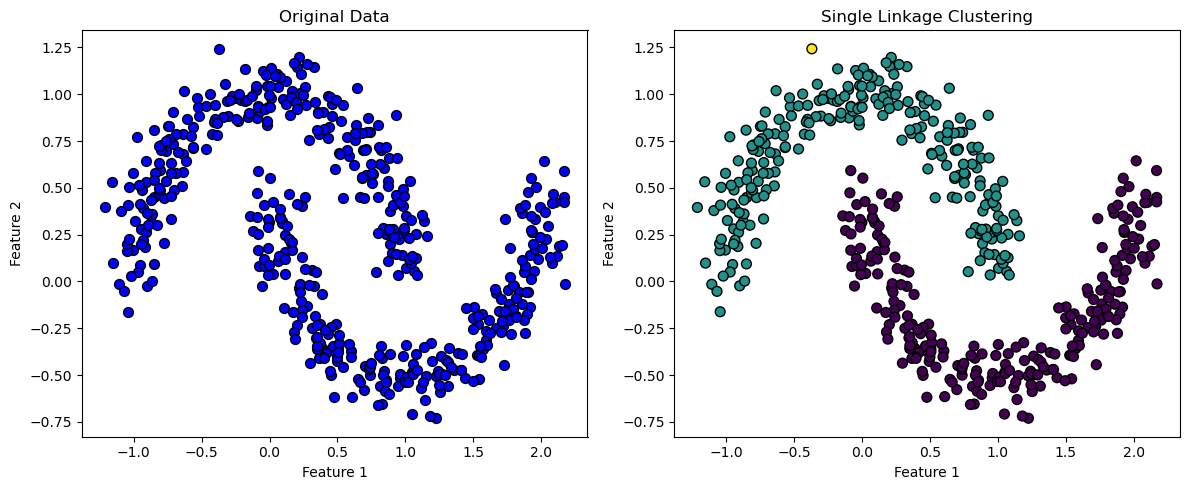

Data type: circles, Linkage method: single


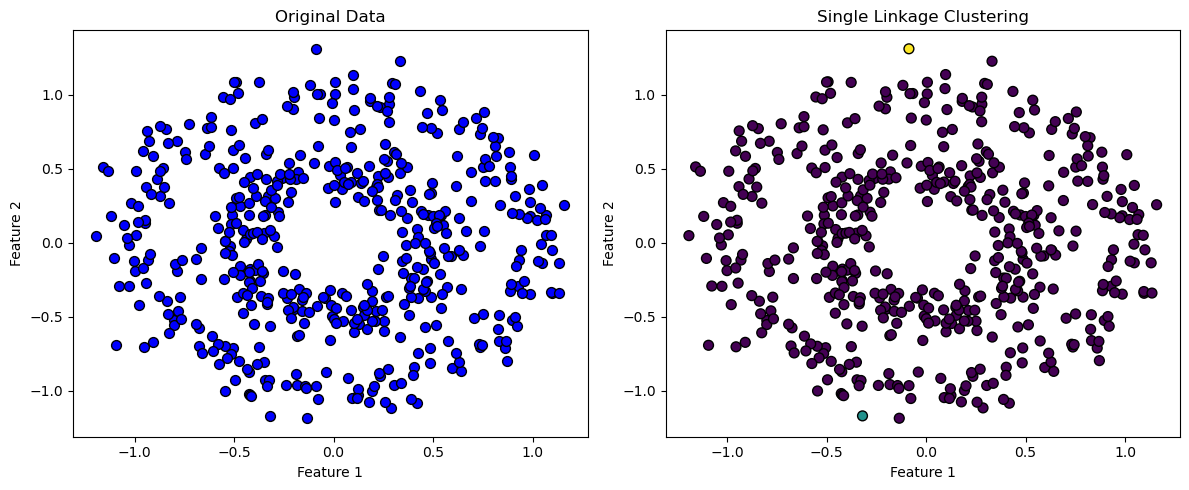

Data type: blobs, Linkage method: single


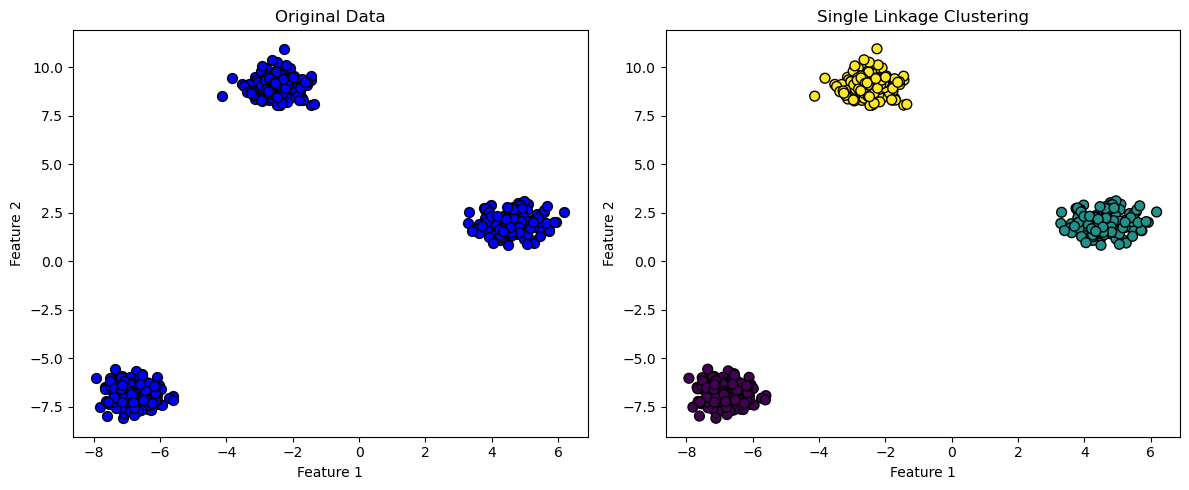

Data type: classification, Linkage method: single


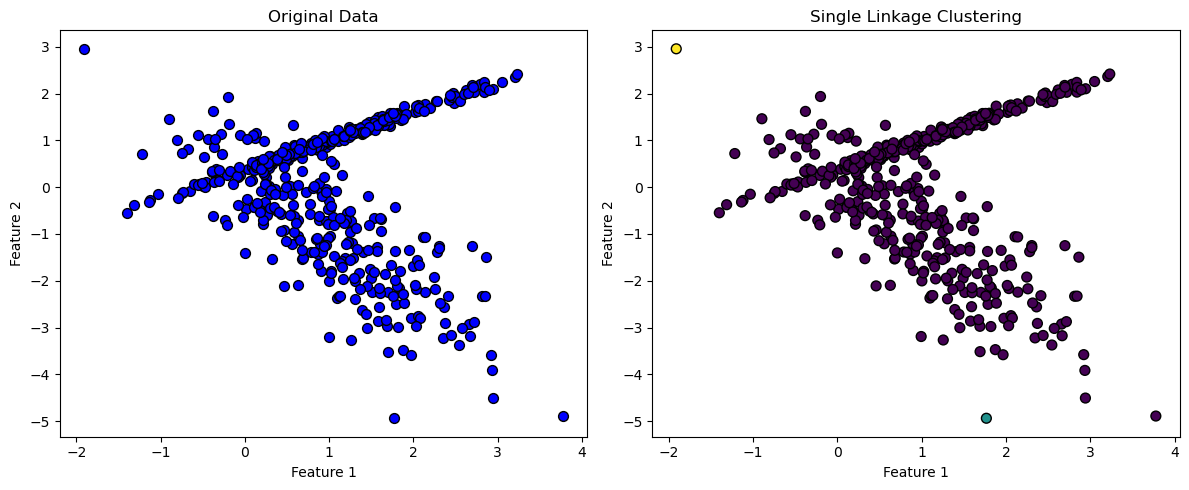

In [66]:
for data_type in data_types:
    X, _ = generate_data(data_type)
    print(f'Data type: {data_type}, Linkage method: {'single'}')
    plot_clustering(X, 'single')